## Machine Learning Project: Japanese Vowel speaker classification

### Importing data into time series arrays 

In [8]:
import numpy as np

In [9]:
# importing data sets
trainData = np.loadtxt("ae.train")
testData = np.loadtxt("ae.test")

In [10]:
# obtaining 270 training time series arrays
# arrays are (N x 12); where N is length of time series recording and 12 is number of dimensions (ie channels)
trainInputs = np.empty((270,1), dtype=object)
readindex = 0

for i in range(1,271):
    readindex = readindex + 1  
    l = 0
    while trainData[readindex-1, 1] != 1:
        l = l + 1 
        readindex = readindex + 1
    trainInputs[i-1,0] = trainData[readindex-l-1:readindex-1,:]


# obtaining 370 test time series arrays 
# arrays are (N x 12); where N is length of time series recording and 12 is number of dimensions (ie channels)
testInputs = np.empty((370,1), dtype=object)
readindex = 0

for i in range(1,371):
    readindex = readindex + 1
    l = 0 
    while testData[readindex-1, 1] != 1:
        l = l+1 
        readindex = readindex + 1
    testInputs[i-1,0] = testData[readindex-l-1:readindex-1,:] 

In [11]:
# obtaining 270 training outputs (speaker targets)
# arrays are (N x 9); where N is length of time series recording and 9 is number of different speakers
# the speaker is indicated with a '1'
trainOutputs = np.empty((270,1), dtype=object)

for i in range(1,271):
    l = np.size(trainInputs[i-1,0],0)
    teacher = np.zeros((l,9))
    speakerIndex = np.ceil(i/30)
    teacher[:,np.int(speakerIndex)-1] = 1 
    trainOutputs[i-1,0] = teacher

# obtaining 370 test outputs (speaker targets)
# arrays are (N x 9); where N is length of time series recording and 9 is number of different speakers
# the speaker is indicated with a '1'
testOutputs = np.empty((370,1), dtype=object)
speakerIndex = 1
blockCounter = 0
blockLengthes = [31, 35, 88, 44, 29, 24, 40, 50, 29]
for i in range(1, 371):
    blockCounter = blockCounter + 1 
    if blockCounter == blockLengthes[speakerIndex-1] + 1:
        speakerIndex = speakerIndex + 1
        blockCounter = 1
    l = np.size(testInputs[i-1,0], 0)
    teacher = np.zeros((l,9))
    teacher[:,np.int(speakerIndex)-1] = 1   
    testOutputs[i-1, 0] = teacher

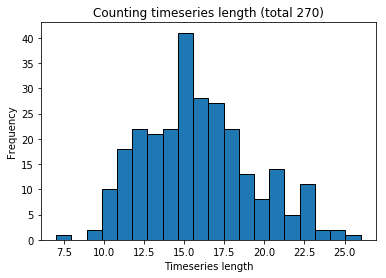

In [12]:
# Prints histogram of timeseries length (exploratory analysis)
import matplotlib.pyplot as plt

histos = np.zeros(270)

for i in range(270):
    histos[i] = (len(trainInputs[i, 0]))

#print(histos)
plt.title('Counting timeseries length (total 270)')
plt.xlabel('Timeseries length')
plt.ylabel('Frequency')
plt.hist(histos, bins = 20, ec='black')
plt.show()

In [13]:
# Pads the training inputs with zeroes to make all the timeseries of equal length
size_max = 12 * 26
trainInputsPadded = np.empty((270,size_max), dtype=object)
trainInputsPaddedBefore = np.empty((270,size_max), dtype=object)

idx = 0 
for element in trainInputs:
    print(element)
    element = np.ndarray.flatten(element[0])
    print(element)
    print(len(element))
    # Pads zeroes before    
    elements = element
    elements = np.pad(elements, (size_max - len(elements), 0), 'constant')
    trainInputsPaddedBefore[idx] = elements
    
    # Pads zeroes after
    # Pad element with zeroes until it reaches the shape of the largest timeseries (12 * 26 = 312)
    shape = np.shape(element)
    padded_array = np.zeros(size_max)
    padded_array[:shape[0]] = element  
    element = padded_array
    print(element)

    trainInputsPadded[idx] = element
    idx = idx + 1

trainOutputsNew = np.empty((270,1), dtype=object)

# Transforms the trainOutputs in classes 1-9
idxx = 0
for elements in trainOutputs:
    for i in range(len(elements[0][0])):
       if elements[0][0][i] == 1:
           trainOutputsNew[idxx] = i + 1
           idxx = idxx + 1
        
trainOutputsNew = np.ravel(trainOutputsNew)
trainOutputsNew = trainOutputsNew.astype('int')

print('trainInputsPadded:', trainInputsPadded)
print('Length trainInputsPadded:', len(trainInputsPadded))

print('\ntrainOutputsNew:', trainOutputsNew)
print('Length trainOutputsNew:', len(trainOutputsNew))


[array([[ 1.860936, -0.207383,  0.261557, -0.214562, -0.171253, -0.118167,
        -0.277557,  0.025668,  0.126701, -0.306756, -0.213076,  0.088728],
       [ 1.891651, -0.193249,  0.235363, -0.249118, -0.11289 , -0.112238,
        -0.311997, -0.027122,  0.171457, -0.289431, -0.247722,  0.093011],
       [ 1.939205, -0.239664,  0.258561, -0.291458, -0.041053, -0.102034,
        -0.3833  ,  0.019013,  0.16951 , -0.314894, -0.227908,  0.074638],
       [ 1.717517, -0.218572,  0.217119, -0.228186, -0.018608, -0.137624,
        -0.403318, -0.009643,  0.164607, -0.323267, -0.210105,  0.098098],
       [ 1.741191, -0.279891,  0.196583, -0.236377, -0.032012, -0.090612,
        -0.363134, -0.012571,  0.124298, -0.351171, -0.216545,  0.113899],
       [ 1.684695, -0.311977,  0.195453, -0.23197 , -0.06867 , -0.003822,
        -0.34194 , -0.008826,  0.085097, -0.364329, -0.204794,  0.101838],
       [ 1.637373, -0.336227,  0.152766, -0.223842, -0.026278, -0.009157,
        -0.363866, -0.003117,  

[array([[ 1.298242e+00, -1.458480e-01,  6.024390e-01, -5.589090e-01,
        -6.329900e-02, -3.716420e-01,  1.086000e-03,  2.859560e-01,
        -2.387740e-01, -1.888240e-01, -4.012300e-02,  1.228680e-01],
       [ 1.284513e+00, -1.153590e-01,  5.094880e-01, -5.243510e-01,
        -9.762700e-02, -3.525640e-01,  8.034700e-02,  1.825530e-01,
        -2.668520e-01, -1.679010e-01, -4.967400e-02,  1.241650e-01],
       [ 1.366785e+00, -1.772320e-01,  5.024410e-01, -5.716540e-01,
        -7.990400e-02, -3.390200e-01,  6.762300e-02,  1.038850e-01,
        -2.761180e-01, -1.204080e-01, -1.058180e-01,  1.597200e-01],
       [ 1.372831e+00, -1.915570e-01,  4.598480e-01, -4.994870e-01,
        -3.967000e-02, -3.331260e-01, -5.106000e-03,  8.708300e-02,
        -2.473590e-01, -1.526820e-01, -6.791300e-02,  1.764250e-01],
       [ 1.417637e+00, -1.579450e-01,  5.201530e-01, -5.726290e-01,
        -3.944600e-02, -2.531990e-01, -5.930700e-02,  4.871500e-02,
        -2.825940e-01, -2.065580e-01, -3.89

[array([[ 1.534764e+00, -2.936340e-01,  6.979250e-01, -2.312670e-01,
        -3.874950e-01, -4.233250e-01, -1.695070e-01,  7.916000e-02,
         1.394750e-01, -9.591000e-02, -1.532680e-01,  2.353280e-01],
       [ 1.534597e+00, -2.759960e-01,  5.986880e-01, -2.559960e-01,
        -3.407200e-01, -4.611270e-01, -1.192700e-01,  1.024040e-01,
         1.288270e-01, -7.207100e-02, -1.879690e-01,  1.993550e-01],
       [ 1.663754e+00, -3.255680e-01,  5.109320e-01, -2.348880e-01,
        -3.231280e-01, -4.673270e-01, -5.679500e-02,  7.706500e-02,
         1.031870e-01, -4.254300e-02, -2.221410e-01,  1.606470e-01],
       [ 1.575393e+00, -5.729630e-01,  5.848840e-01, -1.764300e-01,
        -4.055520e-01, -2.359870e-01, -2.254250e-01,  6.094100e-02,
         1.397390e-01, -1.760760e-01, -1.544240e-01,  1.638180e-01],
       [ 1.291198e+00, -5.299800e-01,  5.875660e-01, -8.484800e-02,
        -3.259380e-01, -2.348770e-01, -3.017440e-01, -5.380000e-04,
         1.335490e-01, -1.904510e-01, -1.46

        -4.62122e-01, -5.54710e-02,  1.70000e-05, -1.84450e-02]])]
[ 3.33580e-01 -7.04027e-01  3.35314e-01 -7.84197e-01 -1.07329e-01
 -4.30870e-01 -1.33000e-04  2.93430e-01 -2.20943e-01 -1.93781e-01
  7.49100e-03  1.52369e-01  2.69163e-01 -6.78218e-01  3.10567e-01
 -7.47552e-01 -4.37030e-02 -4.20980e-01 -2.81840e-02  2.57543e-01
 -2.31370e-01 -2.36446e-01 -3.56200e-02  2.01828e-01  2.15279e-01
 -6.34241e-01  2.88073e-01 -7.14681e-01 -5.13900e-03 -4.17181e-01
 -4.65590e-02  2.22025e-01 -2.39437e-01 -2.65845e-01 -6.81830e-02
  2.43280e-01  2.54496e-01 -6.52893e-01  2.59555e-01 -6.82852e-01
  4.35460e-02 -4.01845e-01 -6.13710e-02  1.87887e-01 -2.44982e-01
 -2.97203e-01 -1.01444e-01  2.81270e-01  2.40951e-01 -6.91718e-01
  2.39862e-01 -6.31083e-01  1.05637e-01 -3.72831e-01 -8.42960e-02
  1.29388e-01 -2.38893e-01 -3.24539e-01 -1.09363e-01  3.15277e-01
  3.27127e-01 -7.69470e-01  2.17732e-01 -5.99387e-01  1.84774e-01
 -3.41512e-01 -1.12507e-01  6.69740e-02 -2.70599e-01 -3.27420e-01
 -8.55610

156
[ 0.377463  0.039072 -0.060005 -0.689421  0.012481 -0.83559  -0.042999
  0.296496 -0.045098 -0.055049 -0.059737  0.090905  0.397459  0.004078
 -0.03308  -0.736267  0.045939 -0.77417  -0.067067  0.326312 -0.089194
 -0.055143 -0.096017  0.091219  0.455239 -0.068376  0.021579 -0.80199
  0.096532 -0.683296 -0.101647  0.348314 -0.139383 -0.069641 -0.138819
  0.088096  0.509819 -0.131371  0.028016 -0.8247    0.150346 -0.614276
 -0.11834   0.337204 -0.151827 -0.116991 -0.164866  0.103709  0.673377
 -0.102094  0.034419 -0.80751   0.229462 -0.600295 -0.108615  0.31579
 -0.197696 -0.149719 -0.165457  0.133353  0.859195 -0.214347  0.046324
 -0.738471  0.237142 -0.525615 -0.079408  0.210593 -0.289917 -0.216318
 -0.090819  0.199956  0.787809 -0.290372 -0.009243 -0.56274   0.228573
 -0.456985 -0.009005  0.046064 -0.265317 -0.306426 -0.095311  0.284669
  0.44778  -0.241285  0.033924 -0.41884   0.337383 -0.420504 -0.016297
 -0.098643 -0.297025 -0.268428 -0.112863  0.323651  0.541664 -0.232254
 -0.

In [14]:
# Crossvalidation. Currently only splitting in train-test data. Ideally, we want a validation set as well (e.g. 80 - 10 - 10 or 60 - 20 - 20)
# Function taken from my Intro to Data Science assignment 3 code
from sklearn.model_selection import train_test_split

def splitData(inputs, outputs):   
    # To avoid overfitting, we divide the dataset into a part for training and a part for testing
    # We split the dataset into 80% training data and 20% testing data
    inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(
            inputs, outputs, test_size=0.20) 
    
    return inputs_train, inputs_test, outputs_train, outputs_test

inputs_train, inputs_test, outputs_train, outputs_test = splitData(trainInputsPadded, trainOutputsNew)

print('Length inputs_train:', len(inputs_train))
print('Length outputs_train:', len(outputs_train))
print('Length inputs_test:', len(trainOutputsNew))
print('Length trainOutputsNew:', len(trainOutputsNew))


Length inputs_train: 216
Length outputs_train: 216
Length inputs_test: 270
Length trainOutputsNew: 270


In [15]:
from sklearn import svm

# Implementation Support Vector Machine
def SVM(inputs_train, outputs_train, inputs_test):    
    # Create a classifier 
    classifier = svm.SVC(kernel='linear')    
    outputs_train = outputs_train.astype('int')
    classifier.fit(inputs_train, outputs_train)
    
    # Predict the test data
    labels_prediction = classifier.predict(inputs_test)

    return labels_prediction

def predictLabels(trainInputs, trainOutputs):
    inputs_train, inputs_test, outputs_train, outputs_test = splitData(trainInputs, trainOutputs)

    # Predict the test labels
    prediction = SVM(inputs_train, outputs_train, inputs_test)

    # Print results
    wrong = 0
    length = len(prediction)
    for i in range(length):
        #print(prediction[i], np.ravel(outputs_test)[i])
        if(prediction[i] != np.ravel(outputs_test)[i]):
            wrong = wrong + 1

    return ((length - wrong) / length) * 100


accuracy_padded_after = np.zeros(100)
accuracy_padded_before = np.zeros(100)
for j in range(100):
    accuracy_padded_after[j] = predictLabels(trainInputsPadded, trainOutputsNew)
    accuracy_padded_before[j] = predictLabels(trainInputsPaddedBefore, trainOutputsNew)
    
print("Average accuracy padded after:", np.mean(accuracy_padded_after))
print("Average accuracy padded before:", np.mean(accuracy_padded_before))



Average accuracy padded after: 96.50000000000001
Average accuracy padded before: 95.35185185185185


In [24]:
# Perform preprocessing: PCA
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Try: all data in one vector, so one vector containing vectors of size 12 (temporal information may be lost)
allTrainInputs = []
allTrainInputsLabeled = []
for k in range(len(trainInputs)):
    for l in range(len(trainInputs[k][0])):
        vecToAppend = trainInputs[k][0][l]
        allTrainInputs.append(vecToAppend)
        vecToAppend = np.append(vecToAppend, trainOutputsNew[k])
        allTrainInputsLabeled.append(trainOutputsNew[k])


print(len(allTrainInputs))
print(len(allTrainInputsLabeled))

# Perform PCA
pca = PCA(n_components=5)
pca.fit(allTrainInputs)
principalComponents = pca.fit_transform(allTrainInputs)

print(pca.explained_variance_ratio_)

4274
4274
[0.32377633 0.28287292 0.14747956 0.07169099 0.05580751]


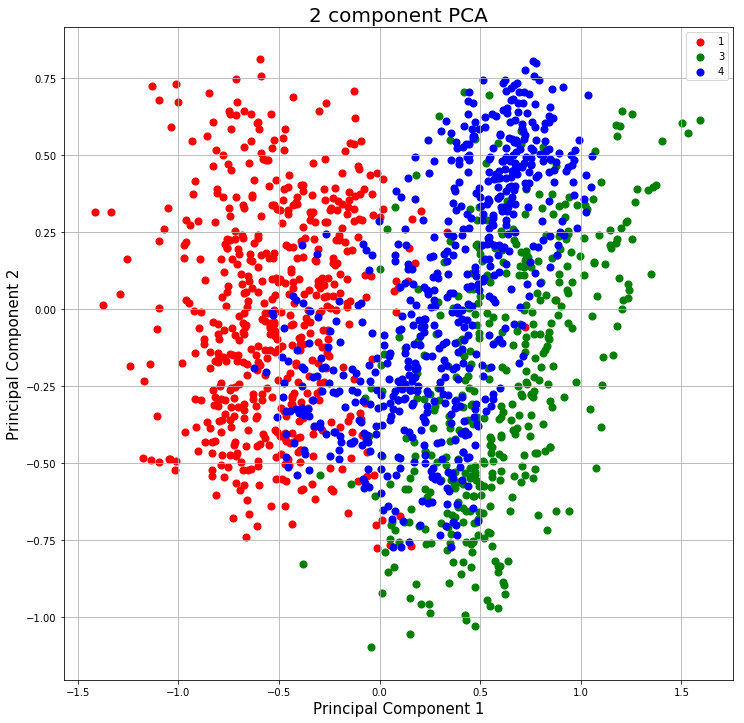

In [31]:
pca = PCA(n_components=2)
pca.fit(allTrainInputs)

# Prints PCA plot (Does only work with a PCA with 2 components)
# Code based on https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
principalComponents = pca.fit_transform(allTrainInputs)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.DataFrame(allTrainInputsLabeled)], axis = 1)
# print(finalDf)

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
# Choose the speakers that you want to visualize in the plot
targets = [1, 3, 4]
colors = 'r', 'g', 'b'
# Uncomment if you want to visualize all speakers
#targets = [1,2,3,4,5,6,7,8,9]
#colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'tab:orange', 'tab:brown']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()